Question 1: Understanding Overfitting with Polynomial Regression<br>
Task: Compare linear vs polynomial regression to observe overfitting.

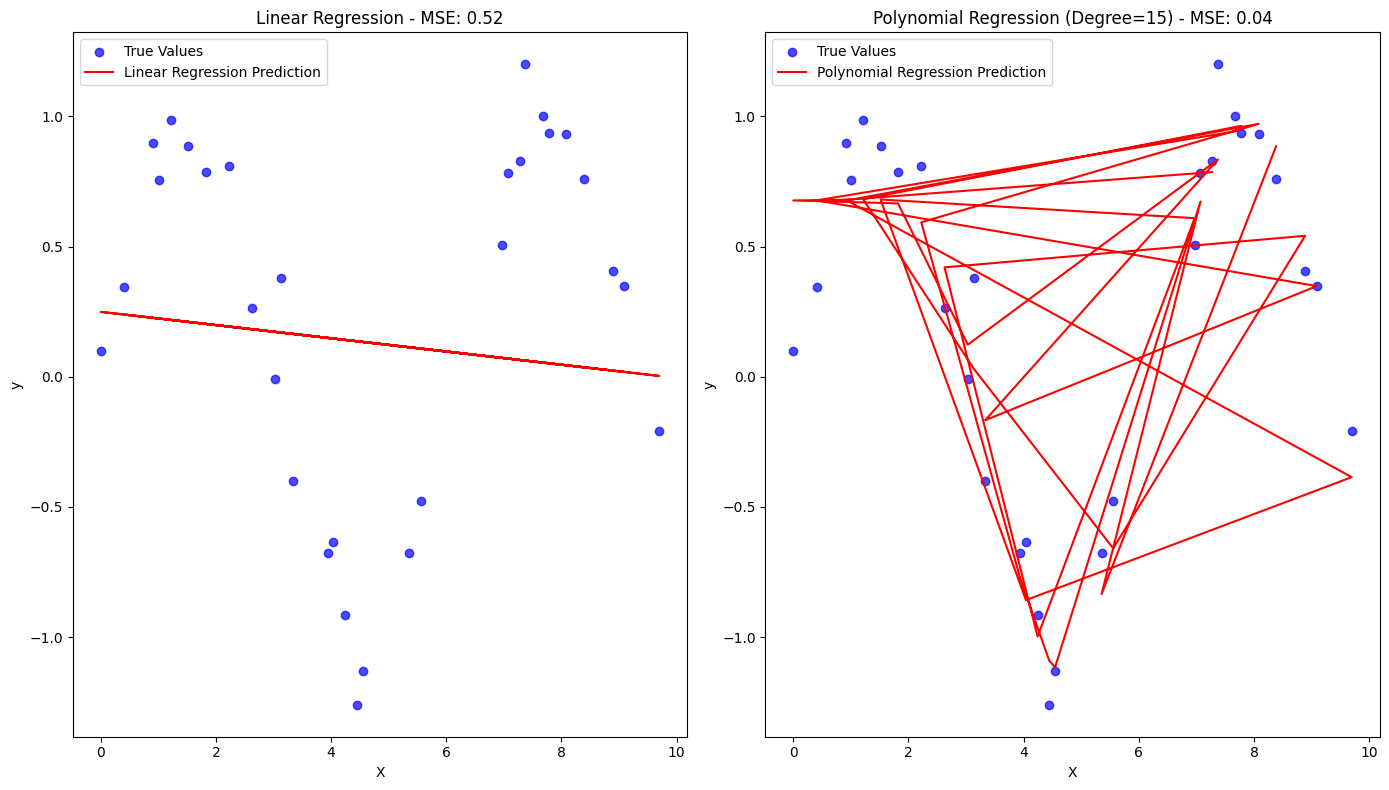

Mean Squared Error for Linear Regression: 0.52
Mean Squared Error for Polynomial Regression (degree 15): 0.04


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Task: Compare linear vs polynomial regression to observe overfitting.

# Generate synthetic data with a non-linear relationship
np.random.seed(42)
X = np.linspace(0, 10, 100).reshape(-1, 1)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])  # Adding noise to simulate real-world data

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)

# Polynomial Regression Model (degree 15 to observe overfitting)
poly_features = PolynomialFeatures(degree=15)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)

# Visualize the results
plt.figure(figsize=(14, 8))

# Plot Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test, y_test, color='blue', label='True Values', alpha=0.7)
plt.plot(X_test, y_pred_linear, color='red', label='Linear Regression Prediction')
plt.title(f'Linear Regression - MSE: {mse_linear:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Plot Polynomial Regression
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='blue', label='True Values', alpha=0.7)
plt.plot(X_test, y_pred_poly, color='red', label='Polynomial Regression Prediction')
plt.title(f'Polynomial Regression (Degree=15) - MSE: {mse_poly:.2f}')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

plt.tight_layout()
plt.show()

# Print MSE for both models
print(f"Mean Squared Error for Linear Regression: {mse_linear:.2f}")
print(f"Mean Squared Error for Polynomial Regression (degree 15): {mse_poly:.2f}")
